In [167]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xlrd
import sklearn
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [168]:
df=pd.read_csv('All_States_GE.csv')

In [169]:
df.columns

Index(['State_Name', 'Assembly_No', 'Constituency_No', 'Year', 'month',
       'Poll_No', 'DelimID', 'Position', 'Candidate', 'Sex', 'Party', 'Votes',
       'Candidate_Type', 'Valid_Votes', 'Electors', 'Constituency_Name',
       'Constituency_Type', 'Sub_Region', 'N_Cand', 'Turnout_Percentage',
       'Vote_Share_Percentage', 'Deposit_Lost', 'Margin', 'Margin_Percentage',
       'ENOP', 'pid', 'Party_Type_TCPD', 'Party_ID', 'last_poll', 'Contested',
       'Last_Party', 'Last_Party_ID', 'Last_Constituency_Name',
       'Same_Constituency', 'Same_Party', 'No_Terms', 'Turncoat', 'Incumbent',
       'Recontest', 'MyNeta_education', 'TCPD_Prof_Main',
       'TCPD_Prof_Main_Desc', 'TCPD_Prof_Second', 'TCPD_Prof_Second_Desc',
       'Election_Type'],
      dtype='object')

In [170]:
#preprocessing
df.drop(['Sub_Region'],axis=1)#dropping sub_region column because it is empty
df.drop(['Candidate'],axis=1)#dropping candidate column because it is empty


,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Sex,Party,...,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Election_Type
0,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,1,M,INC,...,1.0,False,False,True,Graduate Professional,Business,NaN,Social Work,NaN,Lok Sabha Election (GE)
1,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,2,M,BJP,...,0.0,False,False,False,Graduate Professional,Liberal Profession or Professional,Lawyer,NaN,NaN,Lok Sabha Election (GE)
2,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,3,M,IND,...,0.0,False,False,False,Post Graduate,Agriculture,NaN,NaN,NaN,Lok Sabha Election (GE)
3,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,4,M,AAAP,...,0.0,False,False,True,12th Pass,Business,NaN,Politics,Municipality Member,Lok Sabha Election (GE)
4,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,5,M,BSP,...,0.0,False,False,False,Post Graduate,Social Work,NaN,NaN,NaN,Lok Sabha Election (GE)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91664,Mysore,3,23,1965,NaN,1,1,3,NaN,SWA,...,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)
91665,Uttar_Pradesh,3,76,1965,NaN,1,1,1,M,INC,...,1.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)
91666,Uttar_Pradesh,3,76,1965,NaN,1,1,2,NaN,IND,...,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)
91667,Uttar_Pradesh,3,76,1965,NaN,1,1,3,NaN,IND,...,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)


In [171]:

print(df['Candidate_Type'])

0        GEN
1        NaN
2        NaN
3        GEN
4        NaN
        ... 
91664    NaN
91665    NaN
91666    NaN
91667    NaN
91668    NaN
Name: Candidate_Type, Length: 91669, dtype: object


In [172]:
df['Candidate_Type'].unique()
df['Candidate_Type'].replace(['GEN','general','GENERAL','Gen'], int(1), inplace=True)
df['Candidate_Type'].replace(['ST','st'], int(2), inplace=True)
df['Candidate_Type'].replace(['SC','sc'], int(3), inplace=True)
df['Candidate_Type'].fillna(int(0), inplace=True)
df['Candidate_Type']=df['Candidate_Type'].astype(int)

In [173]:
#filtering data only for 2004 to 2
years_to_remove=[1999,1998, 1996, 1997, 1991, 1992, 1993, 1994, 1995, 1989, 1984, 1985,
       1986, 1987, 1988, 1980, 1981, 1982, 1977, 1978, 1979, 1971, 1972,
           1967, 1968, 1969, 1970, 1962, 1963, 1964, 1965,2020, 2021, 2014, 2015, 2016, 2017, 2018, 2011, 2012,
       2013, 2005, 2006, 2007, 2008, 1999, 2000, 2001, 2002, 2003]
df1=df[~df['Year'].isin(years_to_remove)]


In [174]:
df1['Year'].unique()

array([2019, 2009, 2004])

In [175]:
# insight1 no. of female and male candidates for years 
gender_insight = df1.groupby(['Year', 'Sex']).size().reset_index(name='count')

In [176]:
pivot_data = gender_insight.pivot(index='Year', columns='Sex', values='count')

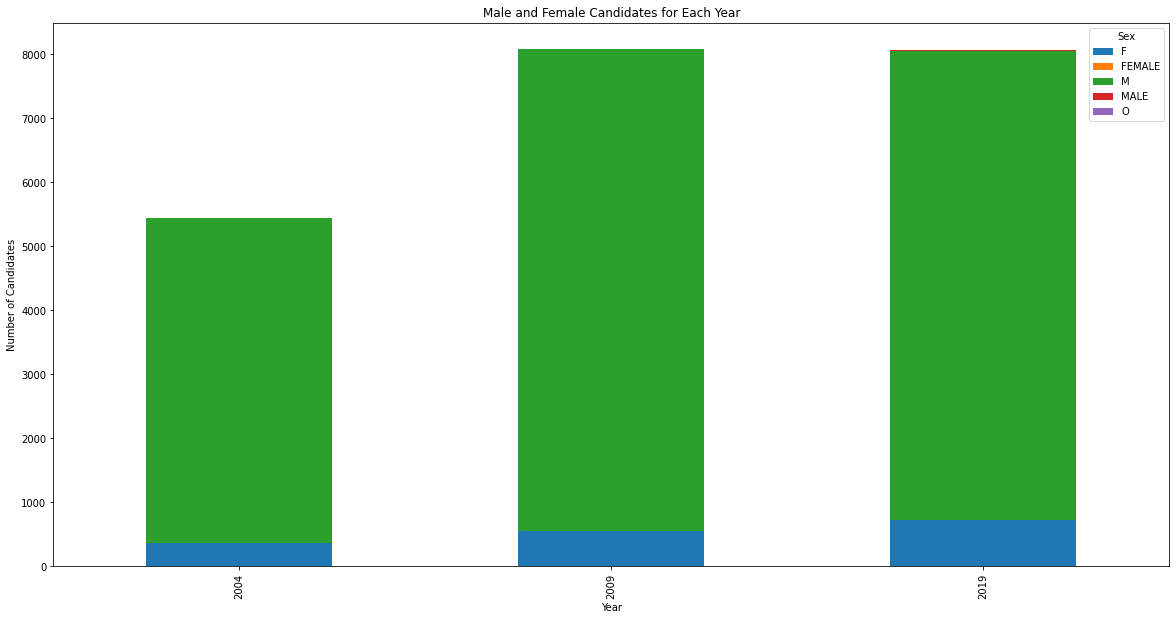

In [177]:

pivot_data.plot(kind='bar', stacked=True, figsize=(20,10), grid=False)

# Add labels and title

plt.xlabel('Year')
plt.ylabel('Number of Candidates')
plt.title('Male and Female Candidates for Each Year')


# Show the plot
plt.show()

In [178]:
correlation=df['Position'].corr(df['Party_ID'])
print(correlation)

0.11309796629038994


<AxesSubplot:xlabel='Party'>

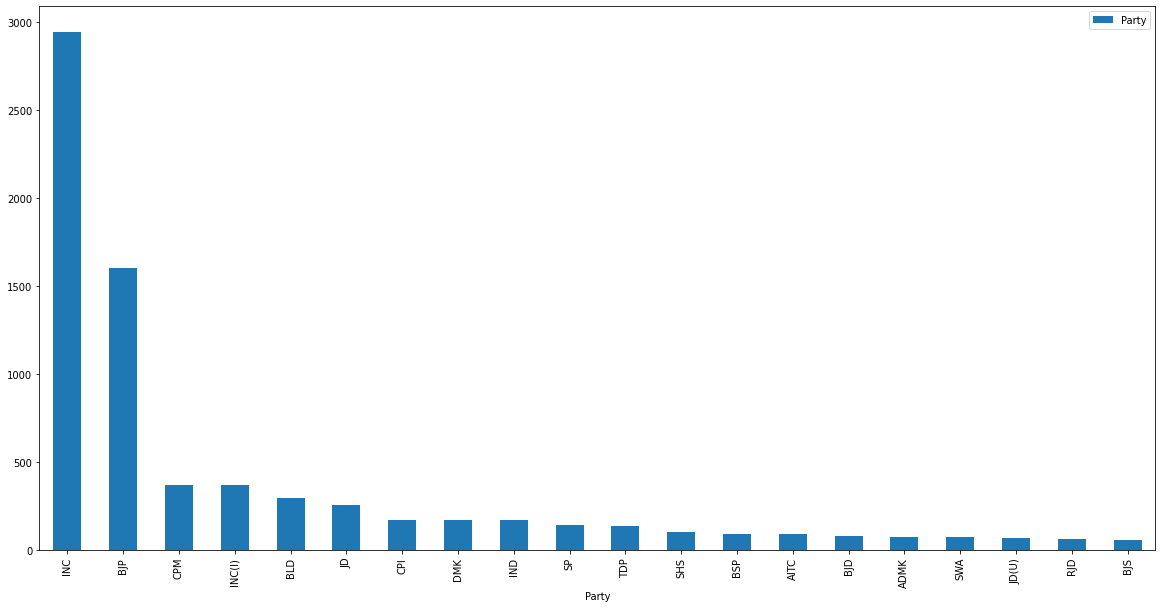

In [179]:
first_position=df.loc[(df['Position']==1)]
first_position_party=first_position.groupby(['Party'])['Party'].count().sort_values(ascending=False)
first_position_party=first_position_party.to_frame()
#print only top 20 parties
x=first_position_party.head(20)
x.plot(kind='bar',figsize=(20,10))


<AxesSubplot:xlabel='Party'>

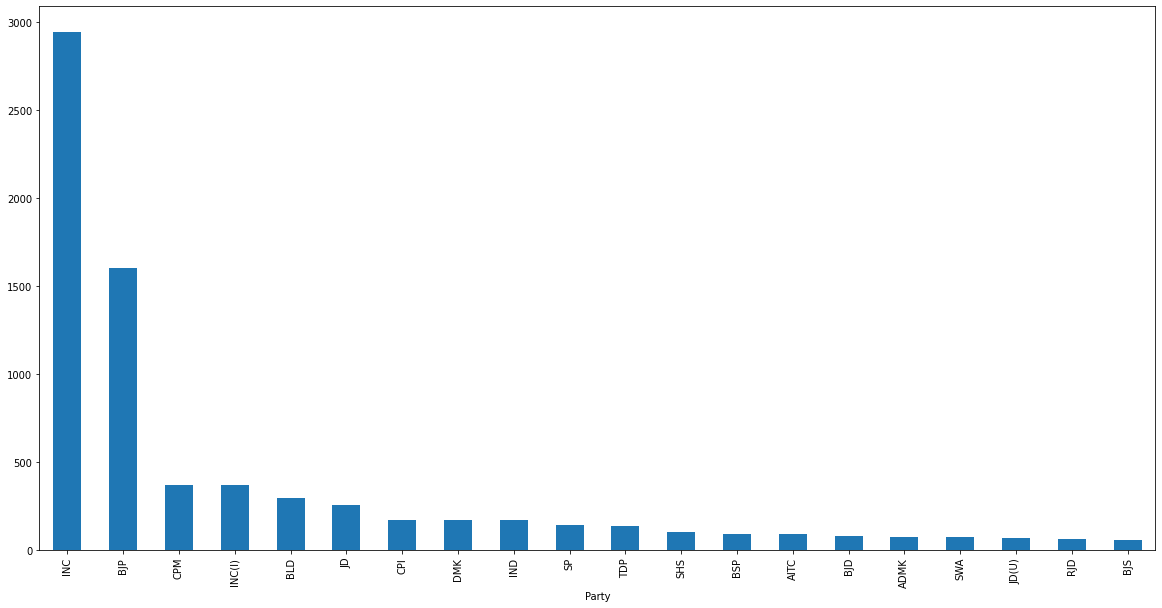

In [180]:
first_position1=df1.loc[(df1['Position']==1)]
first_position_party1=first_position.groupby(['Party'])['Party'].count().sort_values(ascending=False)
#print only top 20 parties
x1=first_position_party1.head(20)
x1.plot(kind='bar',figsize=(20,10))

In [181]:
df.columns

Index(['State_Name', 'Assembly_No', 'Constituency_No', 'Year', 'month',
       'Poll_No', 'DelimID', 'Position', 'Candidate', 'Sex', 'Party', 'Votes',
       'Candidate_Type', 'Valid_Votes', 'Electors', 'Constituency_Name',
       'Constituency_Type', 'Sub_Region', 'N_Cand', 'Turnout_Percentage',
       'Vote_Share_Percentage', 'Deposit_Lost', 'Margin', 'Margin_Percentage',
       'ENOP', 'pid', 'Party_Type_TCPD', 'Party_ID', 'last_poll', 'Contested',
       'Last_Party', 'Last_Party_ID', 'Last_Constituency_Name',
       'Same_Constituency', 'Same_Party', 'No_Terms', 'Turncoat', 'Incumbent',
       'Recontest', 'MyNeta_education', 'TCPD_Prof_Main',
       'TCPD_Prof_Main_Desc', 'TCPD_Prof_Second', 'TCPD_Prof_Second_Desc',
       'Election_Type'],
      dtype='object')

In [182]:
df3=df.drop(columns=['Assembly_No','DelimID','Candidate','Sub_Region','Last_Party','Last_Party_ID', 'Last_Constituency_Name',
       'Same_Constituency', 'Same_Party', 'No_Terms', 'Turncoat', 'Incumbent', 'Election_Type','State_Name','Sex','Constituency_Name','Constituency_Type','Deposit_Lost','pid','Party','Party_Type_TCPD','MyNeta_education','TCPD_Prof_Main',
       'TCPD_Prof_Main_Desc', 'TCPD_Prof_Second', 'TCPD_Prof_Second_Desc','month','Poll_No',
       'Election_Type'])

In [183]:

df3=df3.dropna()
df3=df3.drop_duplicates()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90310 entries, 0 to 91668
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Constituency_No        90310 non-null  int64  
 1   Year                   90310 non-null  int64  
 2   Position               90310 non-null  int64  
 3   Votes                  90310 non-null  float64
 4   Candidate_Type         90310 non-null  int64  
 5   Valid_Votes            90310 non-null  int64  
 6   Electors               90310 non-null  float64
 7   N_Cand                 90310 non-null  int64  
 8   Turnout_Percentage     90310 non-null  float64
 9   Vote_Share_Percentage  90310 non-null  float64
 10  Margin                 90310 non-null  float64
 11  Margin_Percentage      90310 non-null  float64
 12  ENOP                   90310 non-null  float64
 13  Party_ID               90310 non-null  float64
 14  last_poll              90310 non-null  bool   
 15  Co

In [184]:

df3_position1=df3.loc[(df3['Position']==1)]
df3_position2=df3.loc[(df3['Position']==2)]
df3_position3=df3.loc[(df3['Position']==3)]
df3_position1.to_csv('df3_position1.csv',index=False)
df3_position1['Party_ID'].unique()
mapping_idx_partyid = {i:party_id for i, party_id in enumerate(df3_position1['Party_ID'].unique()) }
mapping_partyid_idx = {party_id:i for i, party_id in enumerate(df3_position1['Party_ID'].unique())}
labels = [mapping_partyid_idx[row['Party_ID']] for index, row in df3_position1.iterrows()]

attr = df3_position1.drop(['Party_ID'],axis=1)
mapping_idx_partyid
# mapping

{0: 3482.0,
 1: 8615.0,
 2: 8300.0,
 3: 1605.0,
 4: 795.0,
 5: 10809.0,
 6: 11002.0,
 7: 5029.0,
 8: 11089.0,
 9: 4653.0,
 10: 8958.0,
 11: 10979.0,
 12: 3952.0,
 13: 11341.0,
 14: 14635.0,
 15: 12053.0,
 16: 5792.0,
 17: 18691.0,
 18: 706.0,
 19: 5545.0,
 20: 5671.0,
 21: 5430.0,
 22: 5798.0,
 23: 9079.0,
 24: 16994.0,
 25: 13.0,
 26: 6715.0,
 27: 16569.0,
 28: 10192.0,
 29: 2444.0,
 30: 8488.0,
 31: 930.0,
 32: 8284.0,
 33: 16651.0,
 34: 7425.0,
 35: 956.0,
 36: 18228.0,
 37: 16433.0,
 38: 12103.0,
 39: 3863.0,
 40: 11133.0,
 41: 12961.0,
 42: 737.0,
 43: 7925.0,
 44: 11891.0,
 45: 954.0,
 46: 988.0,
 47: 9451.0,
 48: 978.0,
 49: 3185.0,
 50: 4736.0,
 51: 5501.0,
 52: 9677.0,
 53: 5552.0,
 54: 11601.0,
 55: 12169.0,
 56: 3040.0,
 57: 1748.0,
 58: 3420.0,
 59: 4807.0,
 60: 12285.0,
 61: 5631.0,
 62: 7408.0,
 63: 2472.0,
 64: 10389.0,
 65: 12019.0,
 66: 1875.0,
 67: 11657.0,
 68: 17026.0,
 69: 11561.0,
 70: 412.0,
 71: 4217.0,
 72: 8770.0,
 73: 994.0,
 74: 13028.0,
 75: 7575.0,
 76: 88

In [185]:
# Split for position 1

from sklearn.model_selection import train_test_split
trainX,testX= train_test_split(df3_position1,test_size=0.1,random_state=0)
trainY,testY= train_test_split(labels,test_size=0.1,random_state=0)
trainX.head()



,Constituency_No,Year,Position,Votes,Candidate_Type,Valid_Votes,Electors,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Margin,Margin_Percentage,ENOP,Party_ID,last_poll,Contested,Recontest
63328,53,1991,1,135546.0,0,403986,1044748.0,12,38.67,33.55,28017.0,6.94,4.35,4217.0,True,3.0,False
11209,10,2014,1,652516.0,1,1130725,1740352.0,27,64.97,57.71,466873.0,41.29,2.70,1605.0,True,1.0,False
86639,56,1971,1,142886.0,0,242841,537652.0,11,45.17,58.84,95888.0,39.49,2.56,3482.0,True,1.0,False
2820,12,2019,1,786042.0,1,1153480,1556599.0,13,74.10,68.15,479649.0,41.58,1.89,1605.0,True,7.0,True
72394,16,1984,1,229664.0,0,447256,744151.0,7,60.10,51.35,32324.0,7.23,2.22,3482.0,True,3.0,True


In [186]:
trainX.values

array([[53, 1991, 1, ..., True, 3.0, False],
       [10, 2014, 1, ..., True, 1.0, False],
       [56, 1971, 1, ..., True, 1.0, False],
       ...,
       [25, 1989, 1, ..., True, 1.0, False],
       [20, 1998, 1, ..., True, 8.0, True],
       [56, 1999, 1, ..., True, 6.0, True]], dtype=object)

In [187]:
import numpy as np
X_train = trainX.values
X_test = testX.values
y_train = np.array(trainY).astype(int)
y_test = np.array(testY).astype(int)
# Using the standard scaler method to standardize all of the features by converting them into values between -3 and +3.
from sklearn.preprocessing import StandardScaler
X_train, X_test = StandardScaler().fit_transform(X_train), StandardScaler().fit_transform(X_test)
from sklearn.preprocessing import MinMaxScaler
X_train, X_test = MinMaxScaler().fit_transform(X_train), MinMaxScaler().fit_transform(X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7427, 17), (826, 17), (7427,), (826,))

In [188]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
A = [0,1e-9,1e-7,1e-5,0.001, 0.1,1]
for alpha in A:
    print(f'alpha: {alpha}')
    clf = MultinomialNB(alpha=alpha, force_alpha=True)
    clf.fit(X_train, y_train)
    ytrain_pred=clf.predict(X_train)
    ytest_pred=clf.predict(X_test)
    print(f'Accuracy on train is {accuracy_score(y_train,ytrain_pred)}')
    print(f'Accuracy on test is {accuracy_score(y_test,ytest_pred)}')


alpha: 0
Accuracy on train is 0.39585296889726673
Accuracy on test is 0.42736077481840196
alpha: 1e-09
Accuracy on train is 0.41335667160360845
Accuracy on test is 0.4346246973365617
alpha: 1e-07
Accuracy on train is 0.41335667160360845
Accuracy on test is 0.4346246973365617
alpha: 1e-05
Accuracy on train is 0.41335667160360845
Accuracy on test is 0.4346246973365617
alpha: 0.001
Accuracy on train is 0.41335667160360845
Accuracy on test is 0.4346246973365617
alpha: 0.1
Accuracy on train is 0.41335667160360845
Accuracy on test is 0.4346246973365617
alpha: 1
Accuracy on train is 0.41335667160360845
Accuracy on test is 0.4346246973365617


In [189]:
# SVM Classifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
# import seaborn as sb
import numpy as np
C=[0.01,0.1,1,10,100]
kernel=['linear','poly','rbf','sigmoid']
acc = np.zeros((len(C),len(kernel)))
f1 = np.zeros((len(C),len(kernel)))
for c in C:
    for k in kernel:
        clf = svm.SVC(C=c,kernel=k)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc[C.index(c)][kernel.index(k)] = accuracy_score(y_test, y_pred)
        f1[C.index(c)][kernel.index(k)] = f1_score(y_test, y_pred, average='macro')
        conf_mat = confusion_matrix(y_test, y_pred)
        print("Accuracy for C=",c," and kernel=",k," is ",acc[C.index(c)][kernel.index(k)])
        print("F1 score for C=",c," and kernel=",k," is ",f1[C.index(c)][kernel.index(k)])
        # print("Confusion Matrix for C=",c," and kernel=",k," is ",conf_mat,'\n')
       

Accuracy for C= 0.01  and kernel= linear  is  0.513317191283293
F1 score for C= 0.01  and kernel= linear  is  0.027536078960029985
Accuracy for C= 0.01  and kernel= poly  is  0.576271186440678
F1 score for C= 0.01  and kernel= poly  is  0.05384937896372422
Accuracy for C= 0.01  and kernel= rbf  is  0.4782082324455206
F1 score for C= 0.01  and kernel= rbf  is  0.018058437790704224
Accuracy for C= 0.01  and kernel= sigmoid  is  0.4261501210653753
F1 score for C= 0.01  and kernel= sigmoid  is  0.009675682867172228
Accuracy for C= 0.1  and kernel= linear  is  0.648910411622276
F1 score for C= 0.1  and kernel= linear  is  0.07234795438202317
Accuracy for C= 0.1  and kernel= poly  is  0.7300242130750605
F1 score for C= 0.1  and kernel= poly  is  0.14106661803078388
Accuracy for C= 0.1  and kernel= rbf  is  0.5907990314769975
F1 score for C= 0.1  and kernel= rbf  is  0.04115868325444601
Accuracy for C= 0.1  and kernel= sigmoid  is  0.42009685230024213
F1 score for C= 0.1  and kernel= sigmoid 

# MLP

In [190]:
# MLP
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
%matplotlib inline

import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import torch.nn as nn
from tqdm import tqdm

## Model



In [191]:
# MODEL
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP,self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(17, 64),
            nn.ReLU(),
            nn.Linear(64, 142),
            nn.ReLU()
            )
    def forward(self,x):
        output=self.model(x)
        return output
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
models = [SimpleMLP().to(device) for i in range(5)]

In [192]:
class Elections(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform
    def __len__(self):
        return len(self.data)   
    def __getitem__(self, idx):
        # if transform == None:
        return self.data[idx], self.labels[idx]
        # else:
            # return self.transform(self.data[idx]), self.transform(self.labels[idx])
    
trainset = Elections(torch.Tensor(X_train), torch.LongTensor(y_train))  
testset = Elections(torch.Tensor(X_test), torch.LongTensor(y_test))
x,y=trainset[0]
x.shape, y.shape

(torch.Size([17]), torch.Size([]))

In [193]:
trainloader_minibatch = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testloader_minibatch = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)
x,y=iter(trainloader_minibatch).next()
x.shape, y.shape

(torch.Size([64, 17]), torch.Size([64]))

In [194]:
lr=0.001
optimizers =[torch.optim.SGD(models[0].parameters(),lr=lr),torch.optim.SGD(models[1].parameters(), lr=lr, momentum=0.9), torch.optim.SGD(models[2].parameters(),lr=lr,weight_decay=0.0001) ,torch.optim.RMSprop(models[3].parameters(),lr=lr) , torch.optim.Adam(models[4].parameters(), lr=lr)]
criterion = nn.CrossEntropyLoss()
accuracy=np.zeros((len(optimizers),2))
len(optimizers)

5

## Training with sweeps

100%|██████████| 45/45 [00:17<00:00,  2.62it/s]


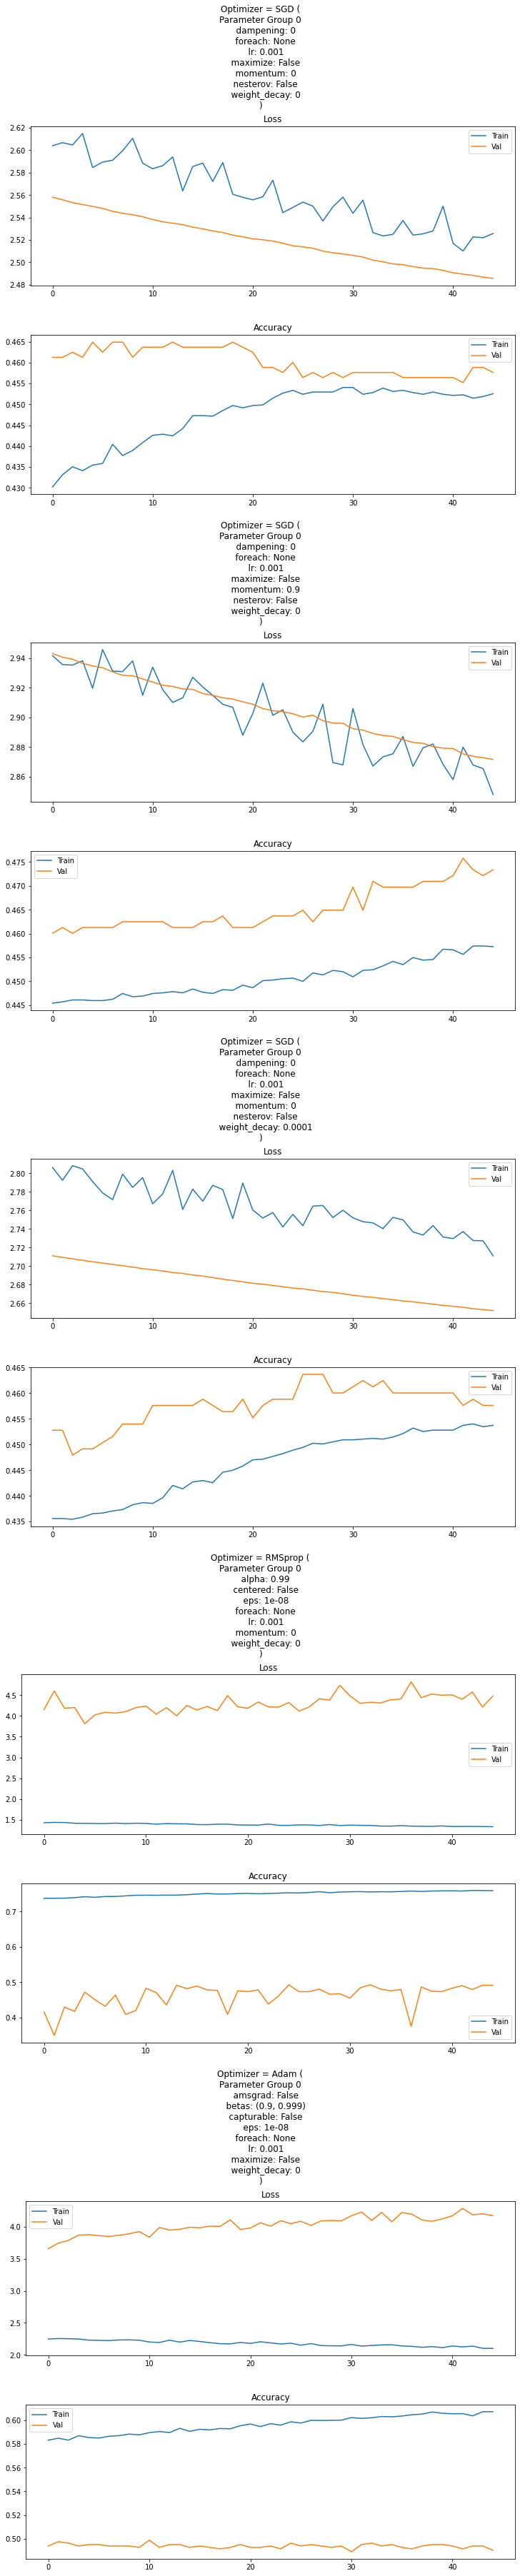

In [197]:
import matplotlib.pyplot as plt
epochs= 45
fig = plt.figure(layout='constrained', figsize=(10, 50))
figs =fig.subfigures(len(optimizers),1)
for o in range(len(optimizers)):
    train_loss=[]
    test_loss=[]
    tr_acc=[]
    te_acc=[]
    min_val_loss=1e9
    for e in tqdm(range(epochs)):
        trl,tel=0,0
        tre=0
        tee=0
        c=0
        for batch in trainloader_minibatch:
            x,y =batch
            x=x.to(device)
            y=y.to(device)
            y_pred = models[o](x)
            trloss = criterion(y_pred,y)
            optim = optimizers[o]
            optim.zero_grad()
            trloss.backward()
            optim.step()
            temp=torch.argmax(y_pred,dim=1)
            for i,t in enumerate(temp):
                c+=1
                if t==y[i]:
                    tre+=1
            # tre/=len(sentence)
            trl+=trloss.item()      
        trl/=len(trainloader_minibatch)
        tre/=c  
        # tre/=len(train_dataset)  
        train_loss.append(trl)
        tr_acc.append(tre)
        c=0
        for sentence in testloader_minibatch:
            with torch.no_grad():
                x,y =sentence
                x=x.to(device)
                y=y.to(device)
                y_pred = models[o](x)
                teloss = criterion(y_pred,y)
                temp=torch.argmax(y_pred,dim=1)
                for i,t in enumerate(temp):
                    c+=1
                    if t==y[i]:
                        tee+=1
                        
                # tee/= len(sentence)
                tel+=teloss.item()
        tel/=len(testloader_minibatch)
        # tee/=len(val_dataset)
        tee/= c
        test_loss.append(tel)
        te_acc.append(tee)
        # print(f'On epochs {e}, training loss = {trl} and training accuracy = {tre}')
        # print(f"On epochs {e}, validation loss = {tel} and validation accuracy = {tee}")
        if tee< min_val_loss:
            min_val_loss=tee
            accuracy[o,0]=tre
            accuracy[o,1]=tee    
    axes =figs[o].subplots(2,1)
    figs[o].suptitle(f"Optimizer = {optimizers[o]}")
    axes[0].plot(range(epochs),train_loss,label='Train')
    axes[0].plot(range(epochs),test_loss,label='Val')
    axes[0].set_title('Loss')
    axes[0].legend()

    axes[1].plot(range(epochs),tr_acc,label='Train')
    axes[1].plot(range(epochs),te_acc,label='Val')
    axes[1].set_title('Accuracy')
    axes[1].legend()
plt.show()

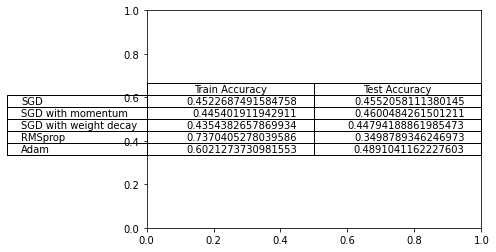

In [198]:
plt.table(cellText=accuracy, rowLabels=['SGD','SGD with momentum','SGD with weight decay','RMSprop','Adam'], colLabels=['Train Accuracy','Test Accuracy'], loc='center')
plt.grid(False)